## Aprendizaje supervisado

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/supervised-machine-learning.png)


Fuente de la imagen: javatpoint.com

### Tareas del aprendizaje supervisado:

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/regresionclasificacion.png)

### Matriz de confusión y métricas de clasificación


![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/confusionMatrx.jpg)


Metricas de regresión

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/metricas-regresion.png)
Fuente de la imagen: sitiobigdata.com


Para empezar retomemos el ejemplo de la notebook anterior y analicemos algunas cosas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

In [2]:
file = 'https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/datasets/binary_cancer/breast-cancer-wisconsin.data'
data_bcancer = pd.read_csv(file)
data_bcancer.head()

,clumb-thick,ucellsize,ucellshape,margadh,singlepcellsize,barenuclei,blandchr,normalnucleoli,mitoses,class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
cols = data_bcancer.columns

df_clean = data_bcancer[cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df_clean.head(5)

,clumb-thick,ucellsize,ucellshape,margadh,singlepcellsize,barenuclei,blandchr,normalnucleoli,mitoses,class
1000025,5,1,1,1,2,1.0,3,1,1,2
1002945,5,4,4,5,7,10.0,3,2,1,2
1015425,3,1,1,1,2,2.0,3,1,1,2
1016277,6,8,8,1,3,4.0,3,7,1,2
1017023,4,1,1,3,2,1.0,3,1,1,2


In [37]:
## Primero separamos el conjunto de entrenamiento con 75% y otro temporal con el 25% 
data_train, data_temp = train_test_split(df_clean.values, train_size=0.75, shuffle=True)
## El temporal lo partimos en dos partes iguales para obtener conjuntos de validacion y de prueba
data_val, data_test = train_test_split(data_temp, test_size=0.5, shuffle=True)
## Separamos X y Y para cada nuevo conjunto
X_train, Y_train = data_train[:,:-1], data_train[:,-1]
X_val, Y_val = data_val[:,:-1], data_val[:,-1]
X_test, Y_test = data_test[:,:-1], data_test[:,-1]
X = np.concatenate((X_train, X_val), axis=0)
Y = np.concatenate((Y_train, Y_val), axis=0)
## Verificamos tamanos
np.shape(X_train), np.shape(X_test), np.shape(X_val), np.shape(Y_train), np.shape(Y_test), np.shape(Y_val), np.shape(X)

((524, 9), (88, 9), (87, 9), (524,), (88,), (87,), (611, 9))

In [38]:
clf = Perceptron(tol=0.001, random_state=0)
clf.fit(X_train, Y_train)

Perceptron()

**Ejercicio:** Hagamos algunas predicciones:

In [39]:
clf.predict(np.array([3,1,1,1,2,2.0,3,1,0]).reshape(1,-1))

array([2.])

Probamos su metrica, en este caso su exactitud:

In [40]:
clf.score(X_test, Y_test)

0.9431818181818182

In [41]:
clf.score(X_train, Y_train)

0.9790076335877863

Grafiquemos su matriz de confusión y calculemos otras métricas:

In [42]:
# classification_report es sensitivity
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

In [43]:
# Calcular matriz de confusion
predictions = clf.predict(X_test)
cm = confusion_matrix(Y_test, predictions, labels=clf.classes_)
cm

array([[53,  3],
       [ 2, 30]])

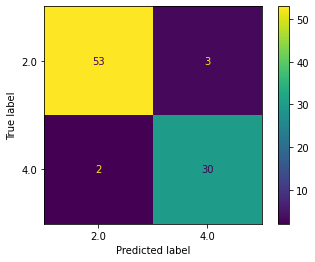

In [44]:
# Graficar mejor la matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [45]:
accuracy_score(Y_test, predictions)

0.9431818181818182

In [46]:
classification_report(Y_test, predictions)

'              precision    recall  f1-score   support\n\n         2.0       0.96      0.95      0.95        56\n         4.0       0.91      0.94      0.92        32\n\n    accuracy                           0.94        88\n   macro avg       0.94      0.94      0.94        88\nweighted avg       0.94      0.94      0.94        88\n'

## Curvas de validación

### Subajuste y sobreajuste

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/underfitting.png)
Fuente de la imagen: aprendemachinelearning.com

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/sklearnfitting.png)
Fuente de la imagen: sklearn.com

### Validación cruzada

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/crossvalidation.png)
Fuente de la imagen: Wikipedia.


In [65]:
from sklearn.model_selection import learning_curve

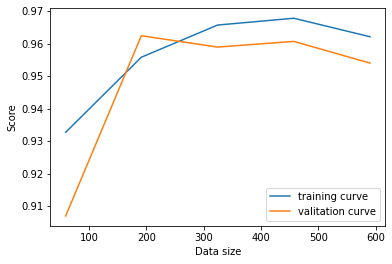

In [64]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(Perceptron(validation_fraction=0.2), X, Y, 
#                                                                       train_sizes=[0.8, 0.2,0.2],
                                                                      cv=30,return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1), label='training curve')
plt.plot(train_sizes,np.mean(test_scores,axis=1), label='valitation curve')
plt.xlabel('Data size')
plt.ylabel('Score')
plt.legend()

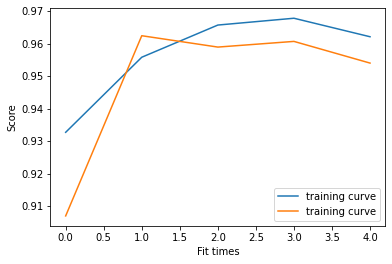

In [67]:
plt.plot(np.mean(train_scores,axis=1), label='training curve')
plt.plot(np.mean(test_scores,axis=1), label='training curve')
plt.xlabel('Fit times')
plt.ylabel('Score')
plt.legend()

## Algoritmos de aprendizaje supervisado

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/supervisedMLalg.png)
Fuente de la imagen: hands-on.cloud

**Analicemos el algoritmo arboles de decisión**

![](https://annalyzin.files.wordpress.com/2016/07/decision-tree-tutorial-animated3.gif)
Fuente del gif: algobeans.com

Probemos este algoritmo con sklearn, primero con un ejemplo trivial, el dataset iris y, después, capturar datos en el grupo y clasificar.

In [69]:
from sklearn import tree

X = [[0, 0], [1, 1]]
Y = [0, 1]
arbol = tree.DecisionTreeClassifier()
arbol = arbol.fit(X, Y)

[Text(167.4, 163.07999999999998, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

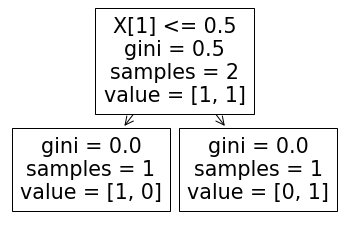

In [72]:
tree.plot_tree(arbol)

In [86]:
r = export_text(arbol)
print(r)

|--- feature_1 <= 0.50
|   |--- class: 0
|--- feature_1 >  0.50
|   |--- class: 1



In [93]:
test_set = np.array([0.9, 0.1]).reshape(1,-1)
arbol.predict(test_set)

array([0])

In [94]:
arbol.predict_proba(test_set)

array([[1., 0.]])

In [101]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()

X_iris = iris.data
Y_iris = iris.target

X_iris_train, X_iris_test = train_test_split(X_iris, train_size=0.8, random_state=0)
Y_iris_train, Y_iris_test = train_test_split(Y_iris, train_size=0.8, random_state=0)

In [103]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X_iris_train, Y_iris_train)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



[Text(133.92000000000002, 181.2, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.048\nsamples = 41\nvalue = [0, 1, 40]')]

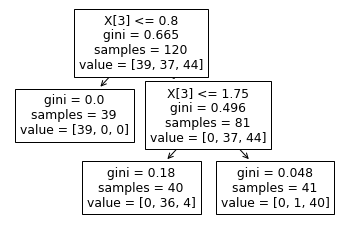

In [104]:
tree.plot_tree(decision_tree)

**Ejercicio**, predecir, calcular métricas y graficar.  